## 1. NUMPY 자료형
NumPy의 ndarray클래스는 포함하는 모든 데이터가 같은 자료형(data type)이어야 한다.
일반 파이썬에서 제공하는 것보다 훨씬 세분화된 자료형

In [2]:
import numpy as np
x=np.array([1,2,3])
x.dtype  # ndarray 객체의 dtype속성으로 자료형을 알 수 있다

dtype('int32')

***
## 2. 배열생성
앞에서 파이썬 리스트를 numpy의 ndarray 객체로 변환하여 생성하려면 array명령을 사용,
그러나 보통은 이러한 기본 객체없이 다음과 같은 명령을 사용하여 바로 ndarray객체를 생성

### 2-1. zeros, ones
크기가 정해져있고, 모든 값이 0인 배열 생성

In [3]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [4]:
np.zeros((5,2), dtype='f8') #dtype 인수를 명시하면 해당 자료형 원소를 가진 배열을 만든다

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [5]:
np.zeros((5,2), dtype='i8')

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [6]:
# 문자열 배열가능(but 모든 원소의 문자열 크기는 같아야한다)
c=np.zeros(5, dtype='S4')
c

array([b'', b'', b'', b'', b''], 
      dtype='|S4')

In [8]:
c[0]='abcd'
c[1]='ABCD'
c

array([b'abcd', b'ABCD', b'', b'', b''], 
      dtype='|S4')

In [9]:
# 1로 초기화된 배열생성
np.ones((2,3,4), dtype='i8')

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int64)

### 2-2. zeros_like, ones_like
크기를 튜플()로 명시하지 않고 특정한 배열or 리스트와 같은 크기의 배열을 생성할때

In [10]:
e=range(10)
print(e)

range(0, 10)


In [11]:
np.ones_like(e, dtype='f')

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [12]:
np.zeros_like(e, dtype='f')

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

### 2-3. empty
배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸림 /
이 시간을 단축하려면 생성만 하고 초기화하지 않는 empty명령 사용 /
empty 명령으로 생성된 배열에 어떤 값이 들어있는지 알 수 없음

In [13]:
np.empty((4,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

### 2-4. arange
numpy버전의 range명령

In [14]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.arange(3,21,2) #시작, 끝(포함x),구간 

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

### 2-5. linspace, logspace
선형구간, 로그구간을 지정한 구간수만큼 분할

In [16]:
np.linspace(0,100,5) #시작, 끝(포함), 개수

array([   0.,   25.,   50.,   75.,  100.])

In [17]:
np.logspace(0,4,4, endpoint=False)

array([    1.,    10.,   100.,  1000.])

### 2-6. random
난수생성 

In [18]:
# random의 서브패키지 seed :  생성할 시드값 지정
np.random.seed(0)

In [19]:
# rand : uniform 분포를 따르는 난수
np.random.rand(4)

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318])

In [20]:
# randn : 가우시안 정규분포를 따라는 난수생성
np.random.randn(3,2)

array([[ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ]])

***
## 3. T (전치연산)
2차원배열의 전치(transpose) 연산은 행과 열을 바꾸는 작업 /
T는 메서드가 아닌 속성

In [22]:
A=np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## 4. 배열의 크기변형
배열의 내부 데이터는 보존한 채로, 형태만 바꿈

### 4-1. reshape

In [24]:
a=np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [25]:
a.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

사용하는 원소의 개수는 정해져있기때문에 reshape명령의 형태 튜플의 원소 중 하나는
-1이라는 숫자로 대체할 수 있다(-1을 넣으면 해당숫자는 다른 값에서 계산되어 사용)

In [26]:
a.reshape(2,2,-1) # 총 원소의 개수 중 계산하고 나머지 부분이 -1의 자리

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [27]:
a.reshape(2,-1,2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

### 4-2. flatten
다차원배열을 1차원배열로 펼침

In [28]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### 4-3. newaxis
같은 배열에 대해 차원만 1차원 증가시키는 명령

In [29]:
x=np.arange(5) #길이가 5인 1차원배열
x

array([0, 1, 2, 3, 4])

In [30]:
x.reshape(5,1) # 5행 1열인 2차원배열

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [32]:
x.reshape(1,5) # 1행 5열인 2차원배열  => !!! 데이터는 같지만 엄연히 다른 객체

array([[0, 1, 2, 3, 4]])

In [33]:
x=x[:, np.newaxis]
x.ndim #2 (2차원)
x

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [34]:
x=x[:, np.newaxis]
x.ndim #2 (2차원)
x

array([[[0]],

       [[1]],

       [[2]],

       [[3]],

       [[4]]])

In [35]:
y=x.reshape(5,1)
y.ndim   #2 (2차원)
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [36]:
y=y[:, np.newaxis]
y.ndim   #3 (3차원)
y

array([[[0]],

       [[1]],

       [[2]],

       [[3]],

       [[4]]])

In [37]:
y.shape

(5, 1, 1)

***
## 5. 배열연결
행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때 사용하는 명령어

### 5-1. hstack
옆으로 연결(배열들의 행의 수 같아야한다)
연결한 배열은 하나의 리스트에 담는다


In [38]:
a1=np.ones((2,3))
a1

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [39]:
a2=np.zeros((2,2))
a2

array([[ 0.,  0.],
       [ 0.,  0.]])

In [40]:
np.hstack( [a1, a2])

array([[ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.]])

In [41]:
np.hstack( [a2, a1])

array([[ 0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  1.]])

### 5-2. vstack
아래로 연결(배열들의 열의 수 같아야한다)

In [42]:
b1=np.ones((2,3))
b1

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [43]:
b2=np.zeros((3,3))
b2

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [44]:
np.vstack( [b1, b2] )

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

### 5-3. dstack
깊이(depth)의 방향으로 연결

In [45]:
c1 = np.ones((3,4))
c1

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [46]:
c2 = np.zeros((3,4))
c2

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [47]:
np.dstack( [c1, c2] )

array([[[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]]])

In [48]:
(np.dstack([c1, c2])).shape

(3, 4, 2)

### 5-4. stack
지정한 차원(축으로) 배열연결 (기본값 axis=0)

In [49]:
np.stack([c1, c2])  #axis=0 수직으로

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

axis=0 가장 안쪽 앞에 차원이 생긴다
2개의 (3x4) => 1개의 (2x3x4)

In [50]:
np.stack([c1, c2], axis=1) # 수평으로

array([[[ 1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.]],

       [[ 1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.]],

       [[ 1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.]]])

2개의 (3x4) => 1개의 (3x2x4)

### 5-5. r_
hstack과 같은 기능 /
() 대신 [ ]사용

In [51]:
a=np.array([1,2,3])
b= np.array([4,5,6])
np.r_[a,b]

array([1, 2, 3, 4, 5, 6])

### 5-6. c_
배열의 차원을 증가시킨 후 좌우로 연결

In [52]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

### 5-7. tile
동일한 배열을 반복하여 연결

In [53]:
a=np.array([0,1,2])
np.tile(a,2)

array([0, 1, 2, 0, 1, 2])

In [54]:
np.tile(a,(3,2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

***
## 6. 그리드 생성
* (x,y)=(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),....,(2,3)
* (x,y)쌍 값들의 조합을 자동으로 해주는 것이 NumPy의 meshigrid
* 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 사각형 영역을 이루는 조합을 출력


In [55]:
x = np.arange(3)
y = np.arange(5)

X,Y=np.meshgrid(x,y)

In [56]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [57]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [58]:
[zip(x, y) for x, y in zip(X, Y)]

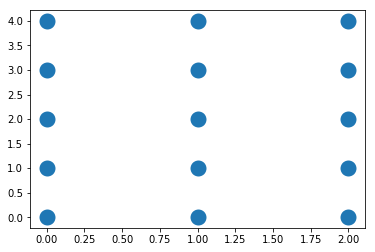

In [59]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, linewidths=10)
plt.show()